# Домашнее задание 6

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_6

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица с $L =1000$, $\mu = 1$, $d = 100$, $b$ - так же случайный вектор.

__(а)__ Для такой задачи симулируем итерацию координатного спуска (смотри семинар). 

Для такого метода подберите шаг $\gamma$ для наилучшей сходимости постройте график сходимости (по оси $y$ - критерий $\| \nabla f(x^k)\|^2$, а по оси $x$ - число арифмитических операций при подсчете "градиента"). Постройте на этом же графике сходимость честного градиентного спуска c наилучшим шагом сходимости. Сделайте вывод о характере сходимости нового метода.

$$
f(x) = \frac{1}{2}x^T A x - b^T x
$$

$$
\nabla f(x) = Ax - b^T
$$

$$
\nabla f_i() = a_i^Tx - b_i
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import math

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

from importlib import reload
import HW_6
reload(HW_6)
from HW_6 import MyLinearRegression

In [2]:
def generate_matrix(d, mu, L):
    """
    Функция генерации симметричной квадратной матрицы(d, d),
    с минимальным собственным числом mu, и нормой матрицы L.

    Inputs:
    - d     : размер матрицы 
    - mu    : минимальное собственное число в матрице
    - L     : норма матрицы    
    
    Returns:
    Сгенерированную матрицу.
    """
    tmp = np.random.rand(d, d)  # генерим случайную матрицу
    tmp = tmp + tmp.T           # делаем её симметричной
    u, s, vh = la.svd(tmp)      # раскладываем по svd
    
    s = s - np.amin(s) + mu     # вычитаем минимальный элемент и прибавляем желаемое значение mu
    s[0] = L

    D = np.diag(s)
    A = u.T @ D @ u

    return A

def plot_models_error(*args):
    _, ax = plt.subplots(1, 2, figsize=(21, 7))
    
    title = args[-1]
    ax[0].set_title(f"Логарифм ошибки {title} от номера итерации ($error = || \\nabla f(w) ||$)")
    ax[0].set_xlabel("Номер итерации")
    ax[0].set_ylabel("Логарифм ошибки")

    ax[1].set_title(f"Логарифм ошибки {title} от времени ($error = || \\nabla f(w) ||$)")
    ax[1].set_xlabel("Время, с")
    ax[1].set_ylabel("Логарифм ошибки")
    
    if isinstance(args[0], list):
        arr = args[0]
    else:
        arr = args
    
    for model in arr:
        y = np.array(model.get_errors())
        x = np.linspace(0, len(y), len(y))
        ax[0].plot(x, np.log(y), label=model.get_name())
        x = np.array(model.get_time())
        ax[1].plot(x, np.log(y), label=model.get_name())
    
    legend_box = ax[1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

def plot_models_acc_error(*args):
    _, ax = plt.subplots(2, 2, figsize=(14, 12))

    ax[0, 0].set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
    ax[0, 0].set_xlabel("Номер итерации")
    ax[0, 0].set_ylabel("Логарифм ошибки")
    
    ax[0, 1].set_title("Логарифм ошибки от времени ($error = || \\nabla f(w) ||$)")
    ax[0, 1].set_xlabel("Время, с")
    ax[0, 1].set_ylabel("Логарифм ошибки")
    
    ax[1, 0].set_title("Точность от номера итерации")
    ax[1, 0].set_xlabel("Номер итерации")
    ax[1, 0].set_ylabel("Точность")
    
    ax[1, 1].set_title("Точность от времени")
    ax[1, 1].set_xlabel("Время, с")
    ax[1, 1].set_ylabel("Точность")

    for model in args:

        y = np.array(model.get_errors())
        x = np.linspace(0, len(y), len(y))
        ax[0, 0].plot(x, np.log(y), label=model.get_name())
        x = np.array(model.get_time())
        ax[0, 1].plot(x, np.log(y), label=model.get_name())

        y = np.array(model.get_accuracy())
        x = np.linspace(0, len(y), len(y))
        ax[1, 0].plot(x, y, label=model.get_name())
        x = np.array(model.get_time())
        ax[1, 1].plot(x, y, label=model.get_name())


    legend_box = ax[1, 1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[1, 0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0, 1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0, 0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

In [3]:
# Параметры задачи минимизации
d = 100
mu = 1
L = 1000
b = np.random.randn(d)
A = generate_matrix(d, mu, L)

In [4]:
models_c = []
learning_rates = np.linspace(0.01/L, 0.5*d/L, 20)

for lr in learning_rates:
    mod_cor = MyLinearRegression(name="SCGD", iter=1000, eps=1e-5, lr_func = lambda w, i: lr, label=f"SCGD lr({lr})")
    mod_cor.fit(A, b)
    models_c.append(mod_cor)

In [5]:
models_g = []
learning_rates = np.linspace(0.01/L, 1.99/L, 20)

for lr in learning_rates:
    mod_cor = MyLinearRegression(name="GD", iter=1000, eps=1e-5, lr_func = lambda w, i: lr, label=f"GD lr({lr})")
    mod_cor.fit(A, b)
    models_g.append(mod_cor)

### Комментарий:
Ошибку для координатного градиентного спуска, я appendю каждые d шагов для того, чтобы масштаб оси oX (числу итераций) был такой же, как и у градиентного спуска.

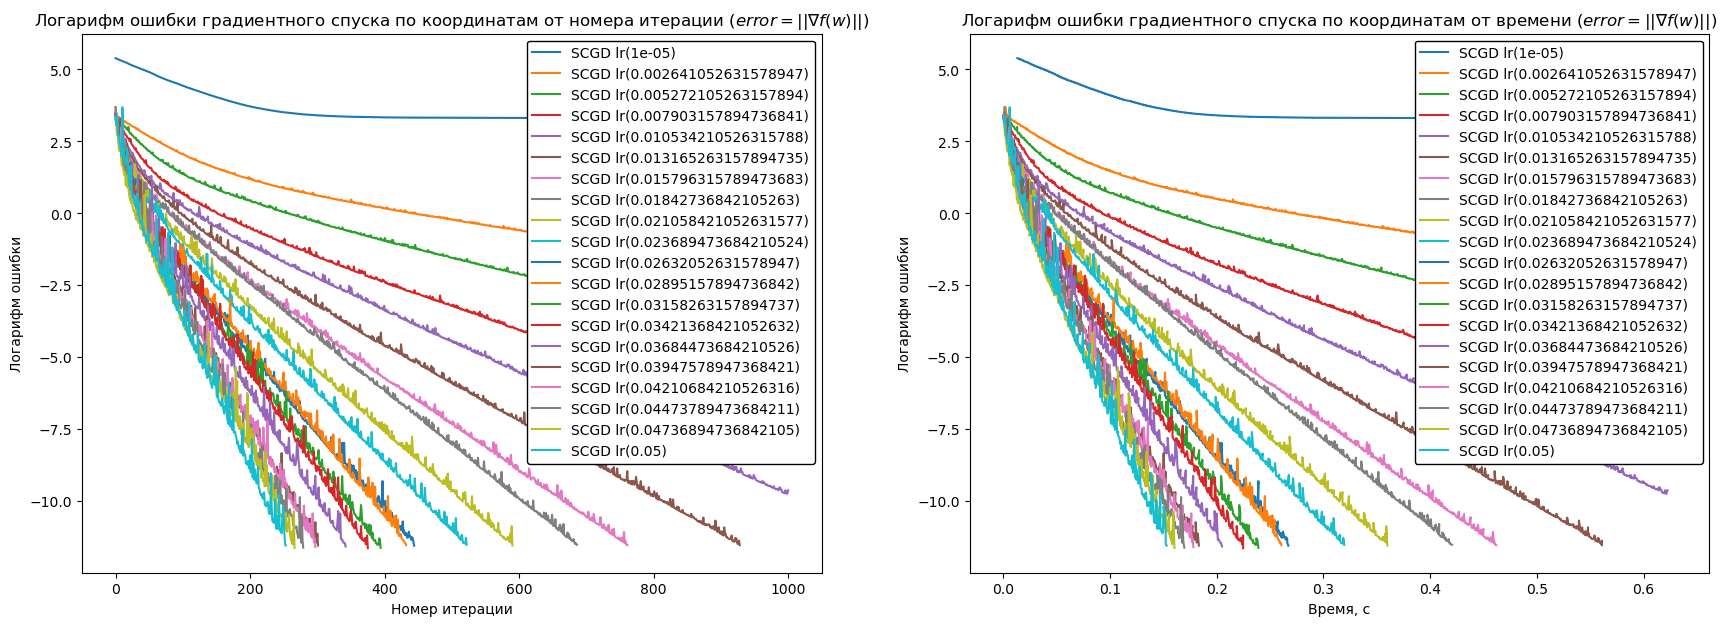

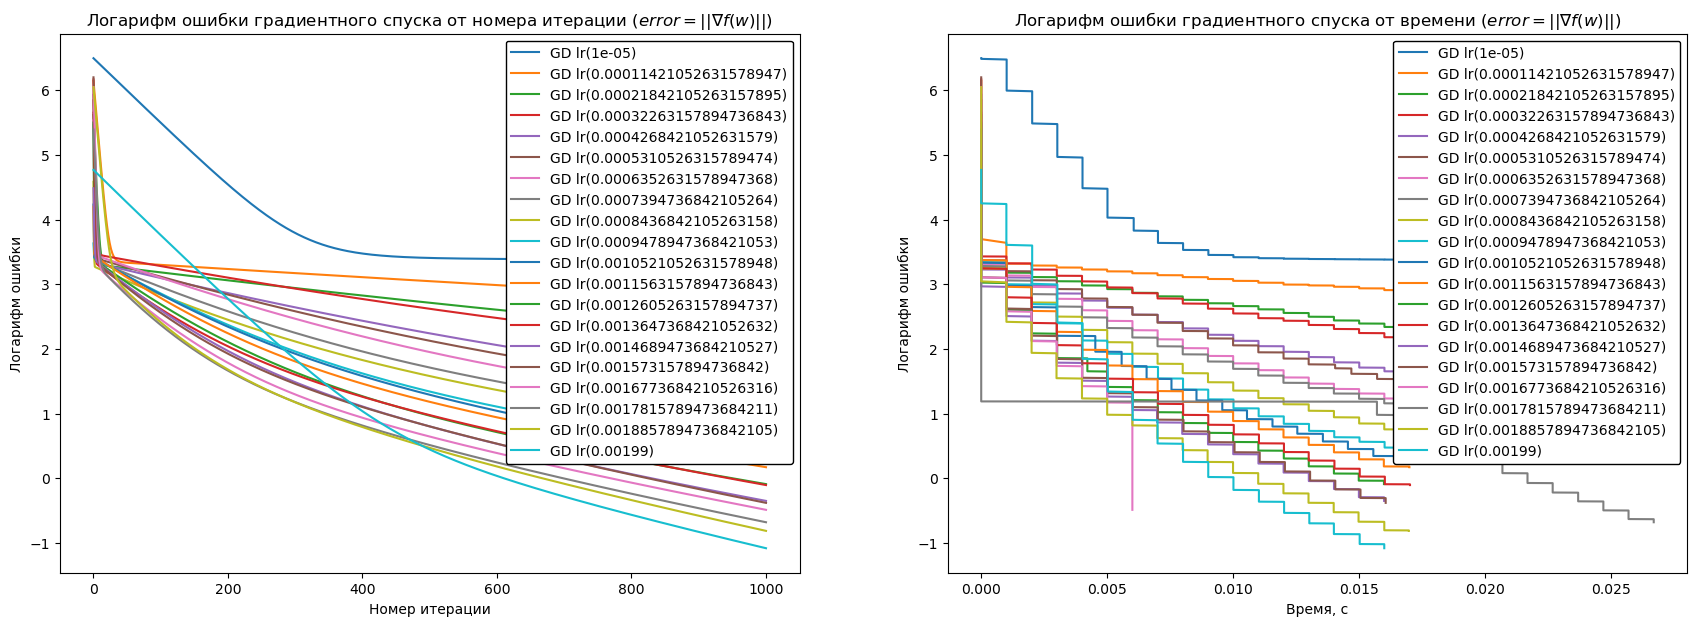

In [6]:
plot_models_error(models_c, 'градиентного спуска по координатам')
plot_models_error(models_g, 'градиентного спуска')

In [7]:
mod_g_best = models_g[-1]
mod_c_best = models_c[-1]

mod_g_best = MyLinearRegression(name="GD", iter=20000, eps=5*1e-5, lr_func = lambda w, i: 1.99/L, label=f"GD lr({lr})")
mod_g_best.fit(A, b)

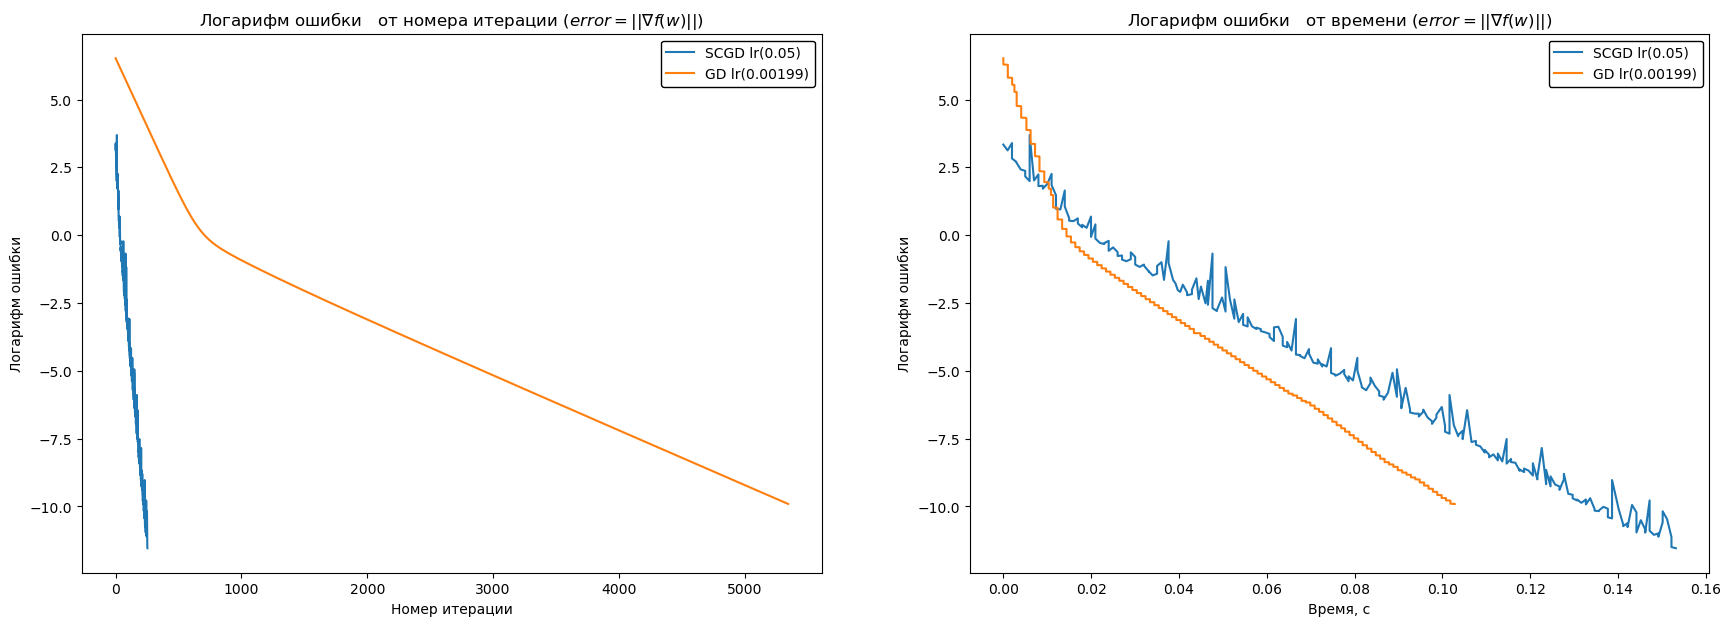

In [8]:
plot_models_error([mod_c_best, mod_g_best], ' ')

# Вывод:
Координатный спуск работате точнее и быстрее относительно количества операций, но заметно проигрывает во врени работы, поэтому на последнем графике для него было увеличена заданная точность и количество операций. Из чего можно сделать вывод, что координатный спуск сходится быстрее от количества операций, но не от времени, поэтому на практике лучше выбирать градиентный спуск и выставлять ему точность побольше. 

__(б)__ В координатном спуске можно брать несколько координат вместо одной. Модифицируйте координнатный спуск, исходя из этого, пробуя разное число координат $b = 1, 5, 10, 20$, а также разные способы сэмплирования: все координатны независимо или зависимо, чтобы не было повторений в батче. Постройте графики аналогичные пункту (а). Сделайте вывод.

In [9]:
from importlib import reload
import HW_6
reload(HW_6)
from HW_6 import MyLinearRegression

In [10]:
models = []
models_dep = []
betas = [1, 2, 4, 8, 16, 32, 64]
for batch in betas:
    mod = MyLinearRegression(name="SCGDB", iter=1000, eps=5*1e-5, lr_func = lambda w, i: 0.1*d/batch/(L), label=f"SCGD b({batch}) dependent", batch_size=batch, dependent=True)
    mod.fit(A, b)
    models_dep.append(mod)
    models.append(mod)

In [11]:
models_indep = []
betas = [1, 2, 4, 8, 16, 32, 64]
for batch in betas:
    mod = MyLinearRegression(name="SCGDB", iter=1000, eps=5*1e-5, lr_func = lambda w, i: 0.1*d/batch/(L), label=f"SCGD b({batch}) independent", batch=batch, dependent=False)
    mod.fit(A, b)
    models_indep.append(mod)
    models.append(mod)

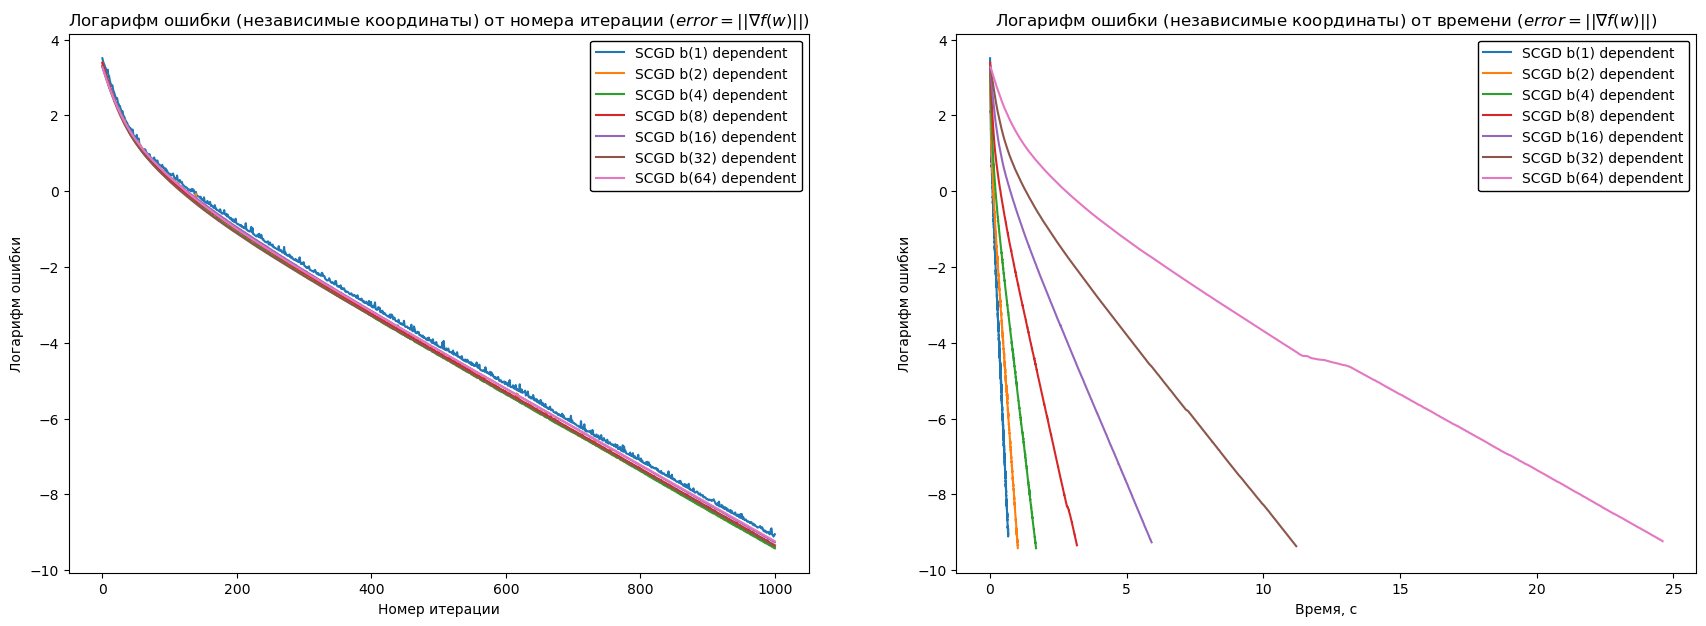

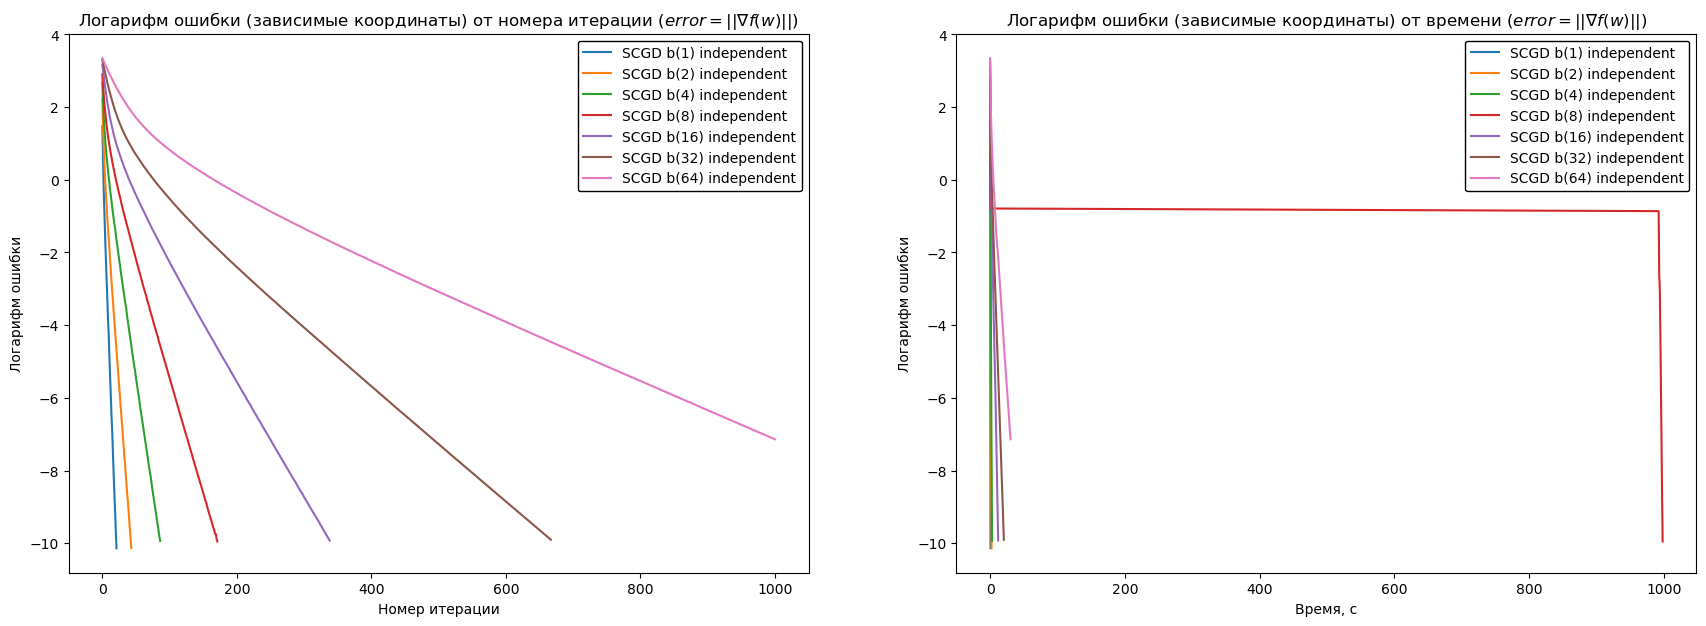

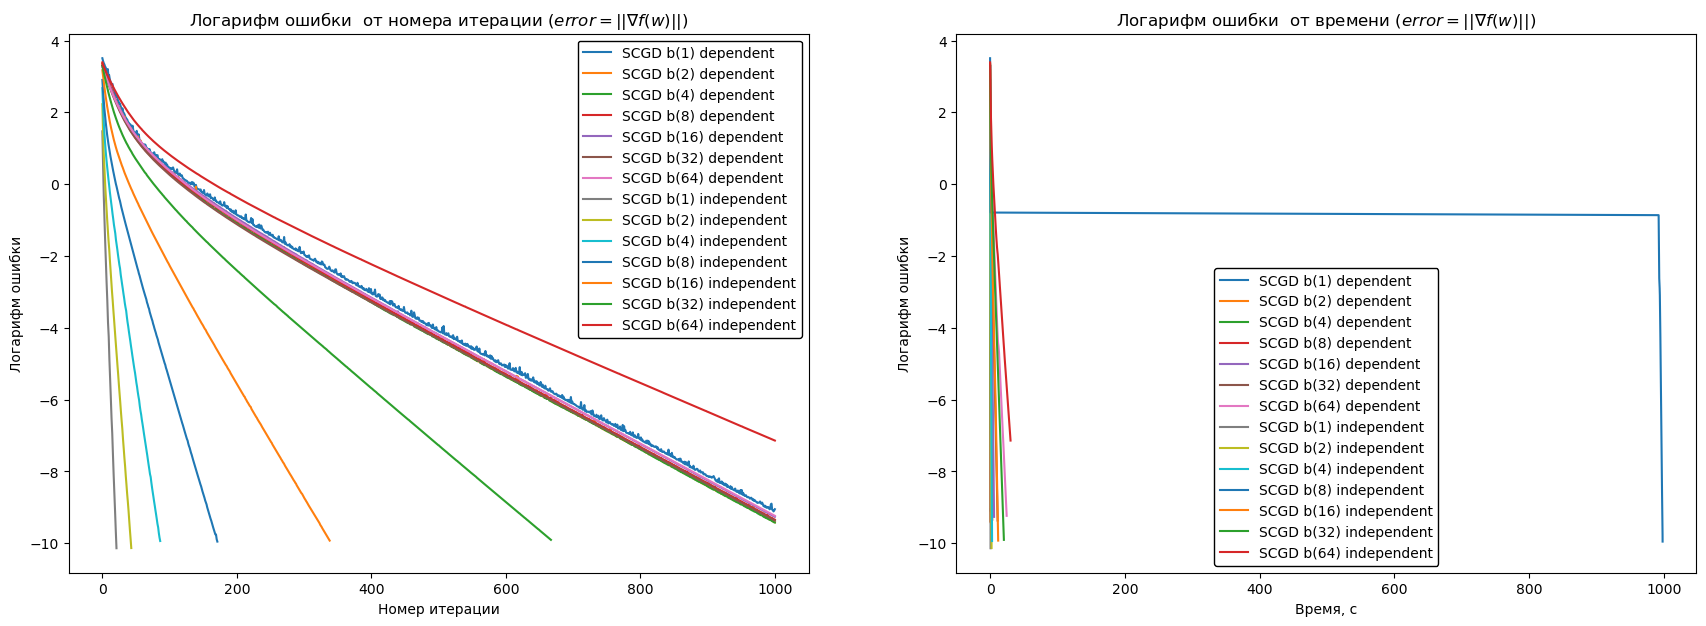

In [12]:
#models = 
plot_models_error(models_dep, '(независимые координаты)')
plot_models_error(models_indep, '(зависимые координаты)')
plot_models_error(models, '')

# Вывод:
Из вышестоящих графиков можно сделать вывод, что размер не влияет на скорость сходимости, также как и способ выбора координат в батче зависимо или незасивисимо друг от друга. 

## Задача 2

Рассмотрим задачу линейной регрессии на датасете mushrooms с $\ell_2$-регуляризацией (коэффициент регуляризации равен $\frac{L}{1000}$). 

__(а)__ Оцените $\mu$ и $L$ для данной задачи. 

Константу Липшица L градиентов мы можем оценить, как в 3-м задании, а именно, посчитаем $\nabla^2 f_i$:

$$
\nabla^2 f_i = \frac{x_i x_i^T}{(1 + \exp(y_i \cdot (w^Tx_i)))^2} \exp(y_i \cdot (w^T x_i))
$$

Тогда:
\begin{equation}
\nabla^2 f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{y_i^2 \cdot x_i x_i^T}{(1 + \exp(y_i \cdot (w^Tx_i)))^2} \exp(y_i \cdot (w^T x_i)) + \frac{L}{1000} I
\end{equation}

Оценим l (константа липшица для функции f(x)) следующим образом, учитывая, что $\frac{\exp(x)}{(1+\exp(x))^2} \leq \frac{1}{4}$:
$$
L \geq \lambda_{max} \left( \frac{1}{4n} \sum\limits_{i=1}^n x_i x_i^T \right) + \frac{L}{1000}
$$

Оценить $\mu$ мы можем с помощью $\frac{L}{1000}$ т.к. сумма $x_ix_i^T$ может равняться нулю

$$
\mu \geq \frac{L}{1000}
$$

__(б)__ Реализуйте координатный SGD, SEGA для задачи линейной регрессии. Каким будете брать $b$? Как будете выбирать шаг и другие параметры методов?

In [13]:
dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
print(X.shape, y.shape)
y = y*2 - 3
print(y)

(8124, 112) (8124,)
[-1.  1.  1. ...  1. -1.  1.]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from importlib import reload
import HW_6
reload(HW_6)
from HW_6 import Mushrooms

In [16]:
n, k = X_train.shape
hessian = 2/n * X_train.T @ X_train
wb, vb = np.linalg.eigh(hessian)
L = wb.max()
print(L)

20.68627190218972


In [37]:
model_GD = Mushrooms(name='GD', label="GD", eps=1e-5, lr_func=lambda w, k: 0.1/L)
model_GD.fit(X=X_train, y=y_train, X_test=X_test, y_test=y_test)

In [38]:
model_SCGD = Mushrooms(name='SCGD', eps=1e-5, label='SCGD', lr_func=lambda w, k: 0.1/L, iter=1000)
model_SCGD.fit(X_train, y_train, X_test, y_test)

In [19]:
# Подбираем лучший батч
betas = [8, 16, 32, 64]
learning_rates = [0.1/L, 1/L, 1/(d*L)]
segas = []

for beta in betas:
    for lr in learning_rates:
        model_SEGA = Mushrooms(name='SEGA', eps=1e-5, label=f'SEGA({lr}, {beta})', lr_func=lambda w, k: lr, iter=1000, batch_size=beta)
        model_SEGA.fit(X_train, y_train, X_test, y_test)
        segas.append(model_SEGA)

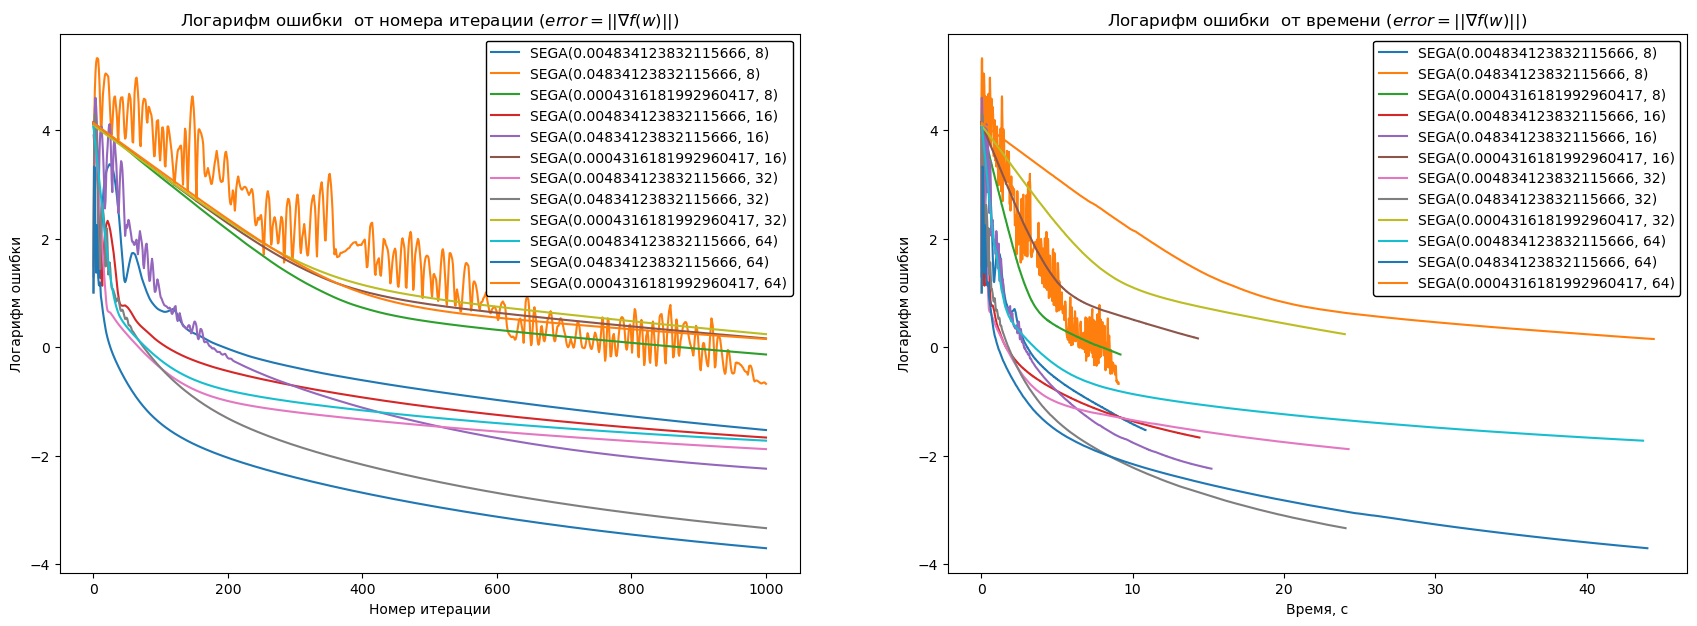

In [20]:
plot_models_error(segas, '')

In [40]:
model_SEGA = Mushrooms(name='SEGA', eps=1e-5, label=f'SEGA({0.1/L}, {32})', lr_func=lambda w, k: 0.1/L, iter=1000, batch_size=32)
model_SEGA.fit(X_train, y_train, X_test, y_test)

__(в)__ Постройте графики сравнения всех методов: по оси $x$ используйте время или количество арифметических операций, по оси $y$ - $\|\nabla f(x^k)\|$ или точность на тесте. Таким образом, всего 4 графика. Сделайте сравнение и вывод.

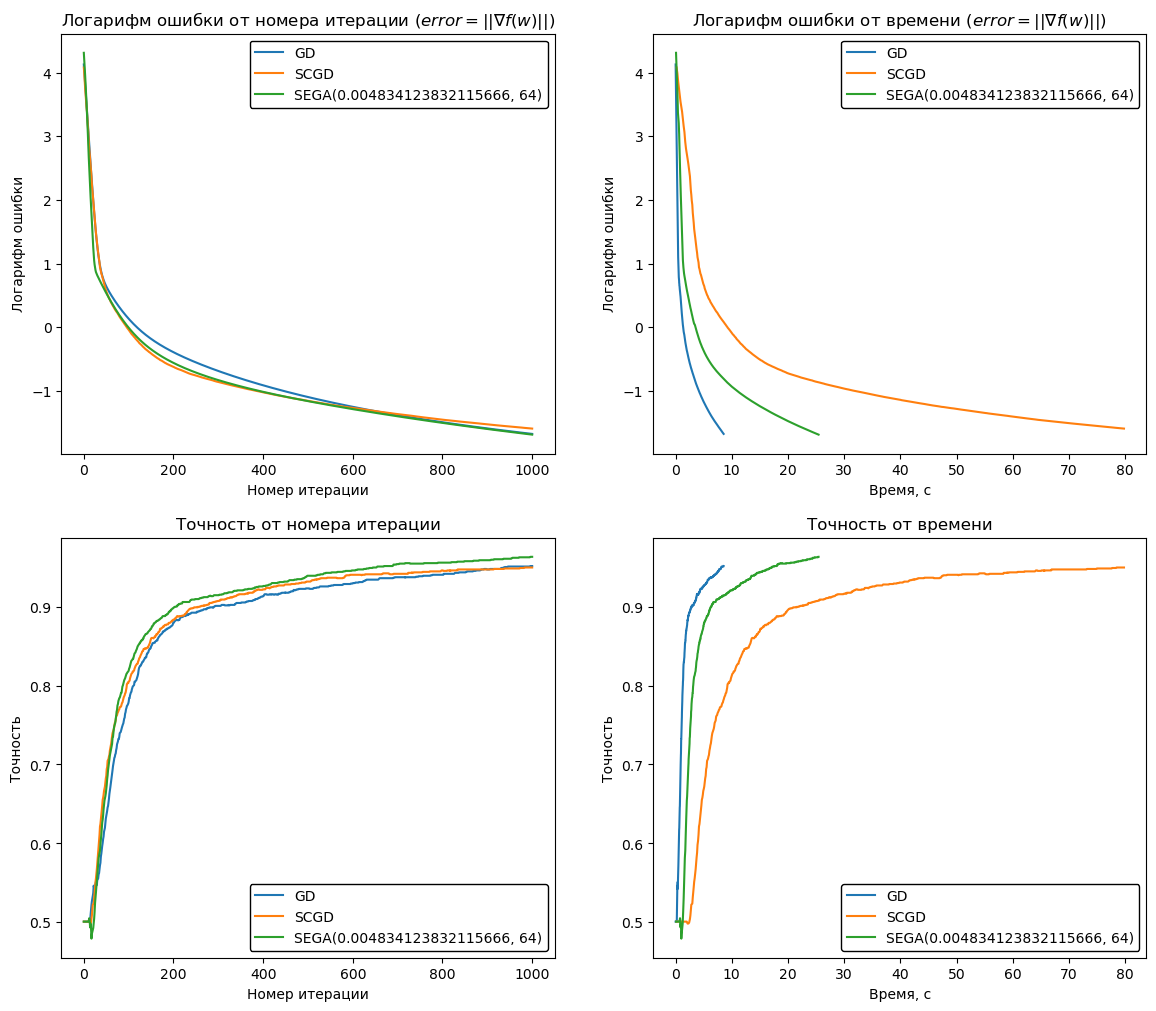

In [41]:
plot_models_acc_error(model_GD, model_SCGD, model_SEGA)

# Вывод:
Наилучший результат показал градиентный спуск, хотя как ранее было сказано в первом пункте он работает дольше, чем градиентный спуск, но гораздо проще оставить градиентный спуск работать подольше и получить результат получше за то же время, может быть при написании промышленных проектов, это как-то инженерно оптимизируют. SEGA и SCGD нужно примерно в 8 раз больше времени, чтобы получить такую же точность на тестовой выборке. Для координатного спуска отлично подходил learning rate $= \frac{d}{10L} $, при нем координатный спуск показывал наилучший результат, для SEGA же стоило наоборот брать learning rate поменьше, при меньшем learning rate алгоритм показывал лучшую сходимость. 

#### От себя:
С каждой домашкой создается ощущение, что лучше использовать самый обычный градиентный спуск, оставив работать его подольше...

__Бонусные пункты__

__(г)__ Попробуйте объеденить подходы SAGA/SVRG/L-SVRG и координатный SGD/SEGA (т.е. могут получиться пары SAGA + координатный, SVRG + SEGA и еще четыре других). Вам достаточно выбрать одну пару. Как при этом будет выглядеть итерация метода (запишите в явном виде)? Докажите сходимость данного подхода для $\mu$-сильно выпуклой $f$ и $L$-гладкой $f_i$.

In [32]:
#ответ

__(д)__ Реализуйте новый метод. Сравните его с двумя методами, которые были взяты за базу, на задаче линейной регресии. Способы сравнения методов придумайте самостоятельно. Сделайте вывод.

In [33]:
#ответ